
Results:

Activated arcs: 

  Arc     Cost
(0, 1)  =  5.385164807134504
(1, 0)  =  5.385164807134504
(2, 4)  =  3.0
(3, 5)  =  4.47213595499958
(4, 2)  =  3.0
(5, 3)  =  4.47213595499958

Total Cost: 25.71460152426817
[[ 3. 10.]
 [ 1.  5.]
 [ 7.  8.]
 [10.  1.]
 [ 4.  8.]
 [ 8.  5.]]


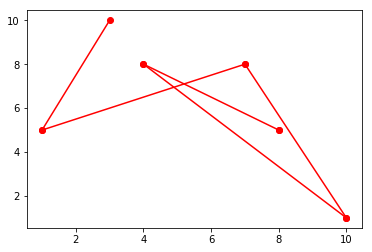

In [188]:
import numpy as np
from scipy.optimize import linprog
from basic_utils import nn2na
import random 
from matplotlib import pyplot as plt


# Nodes quantity. We can make an larger or smaller example changing this value.
qNodes = 6


# Cost Vector. Dim(C) = {1, N^2}
# C = []
# random.seed(a=3)
# for i in range(qNodes*(qNodes-1)):
#     C.append(random.randint(1,10))
# Cost Vector. Dim(C) = {1, N^2}

C = []
random.seed(a=10)
for i in range(qNodes):
    for j in range(2):
        if i != j:
            p[i, j] = random.randint(1,10) 
        
for i in range(qNodes):
    for j in range(qNodes):
        if i != j:
            C.append(distance.euclidean(p[i], p[j])) 

        
NN = np.ones(shape=(qNodes,qNodes), dtype=np.int8)
np.fill_diagonal(NN,0)


# A Matrix. Dim(Aeq) = {2N, A}
NA, arcs = nn2na(NN)
Aeq1 = np.where(NA == 1, 1, 0)
Aeq2 = np.where(NA == -1, 1, 0)
Aeq = np.concatenate((Aeq1, Aeq2), axis=0)

# b Vector. Dim(b) = {2N, 1}
beq = np.zeros(qNodes*2)
beq.fill(1)

# Bounds: 0 por lower, Inf for Upper.
bounds = tuple([(0, None) for arc in range(0, Aeq.shape[1])])

# print("Input arguments:\n\n",
# "\n- Aeq matrix:\n", Aeq,
# "\n- Cost matrix: \n", C,
# "\n- beq vector: \n", beq,
# "\n- Bounds: \n", bounds
# )

#OPTIMIZE:
result = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method='simplex')

print("\nResults:")
print("\nActivated arcs: ")
print("\n  Arc     Cost")
for i in range(len(result.x)):
    if result.x[i] != 0:
        print(arcs[i], " = ", C[i])
    
print("\nTotal Cost:", result.fun)
print(p)
x = [i[0] for i in p]
y = [i[1] for i in p]
for i in range(6):
  plt.plot(x[i:i+2], y[i:i+2], 'ro-')  

plt.show()

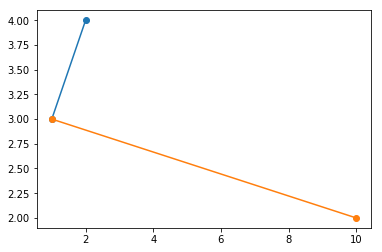

(0, 1)  =  5.385164807134504
(1, 0)  =  5.385164807134504
(2, 4)  =  3.0
(3, 5)  =  4.47213595499958
(4, 2)  =  3.0
(5, 3)  =  4.47213595499958
(0, 1)


In [211]:
import matplotlib.pyplot as plt
x1, y1 = [1, 2], [3, 4]
x2, y2 = [1, 10], [3, 2]
plt.plot(x1, y1, x2, y2, marker = 'o')
plt.show()

for i in range(len(result.x)):
    if result.x[i] != 0:
        activated.append(arcs[i])
        print(arcs[i], " = ", C[i])
print(activated[0])
